<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/regression_trees_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [5]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT6heQqMJFRAAVUqvtEHjSn4lTTARy5iT8ro3I0_wn4_OskZOeq2n6YukqDXKIoESp6meSgGowr1d-J/pub?output=csv'
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [7]:
# Get the features and target
X = df.drop(columns = 'MedHouseVal')
y = df['MedHouseVal']

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Instantiate a decision tree
dec_tree = DecisionTreeRegressor(random_state = 42)

In [13]:
# Fit the mode
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [14]:
# Make predictions
train_pred = dec_tree.predict(X_train)
test_pred = dec_tree.predict(X_test)

In [16]:
# Evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(train_score, test_score)

1.0 0.600578011919574


In [18]:
# Find the depth of the default tree
print(dec_tree.get_depth())
# Find how many nodes are in the default tree
print(dec_tree.get_n_leaves())

36
14841


In [24]:
# Determine the tree depth that minimizes the R2 score
depths = list(range(2,36))
scores = pd.DataFrame(index = depths, columns = ['Test Score', 'Train Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train, y_train)
  scores.loc[depth, 'Test Score'] = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = dec_tree.score(X_train, y_train)

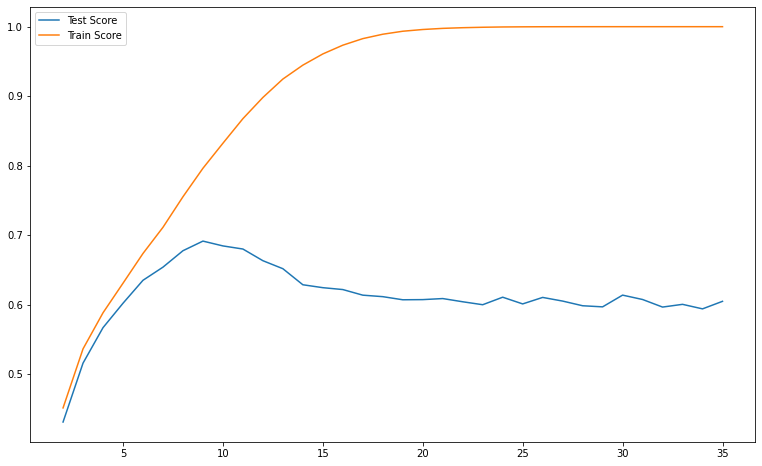

In [31]:
# Graph the errors
plt.figure(figsize = (13,8))
plt.plot(depths, scores['Test Score'], label = 'Test Score')
plt.plot(depths, scores['Train Score'], label = 'Train Score')
plt.legend()

In [32]:
# Run the model with a depth of 9
dec_tree = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)